Assignment 10 Supplementary: Semantic Search Demo
===============

This Python notebook guides you through the code for Text-to-Image and Image-to-Image search.

Prior to starting, you should have a file called `image_embeddings.pickle` and a file called `coco_images_resized.zip` in the current directory.

First, unzip `coco_images_resized.zip`. This directory contains the images that you will search through.

This assignment uses pretrained CLIP (Contrastive Language Image Pretrained) models to embed text and images into a joint embedding space. You can read about CLIP models here: https://www.pinecone.io/learn/clip-image-search/

**Your end goal is to find the most relevant images given either an image or a text query.**

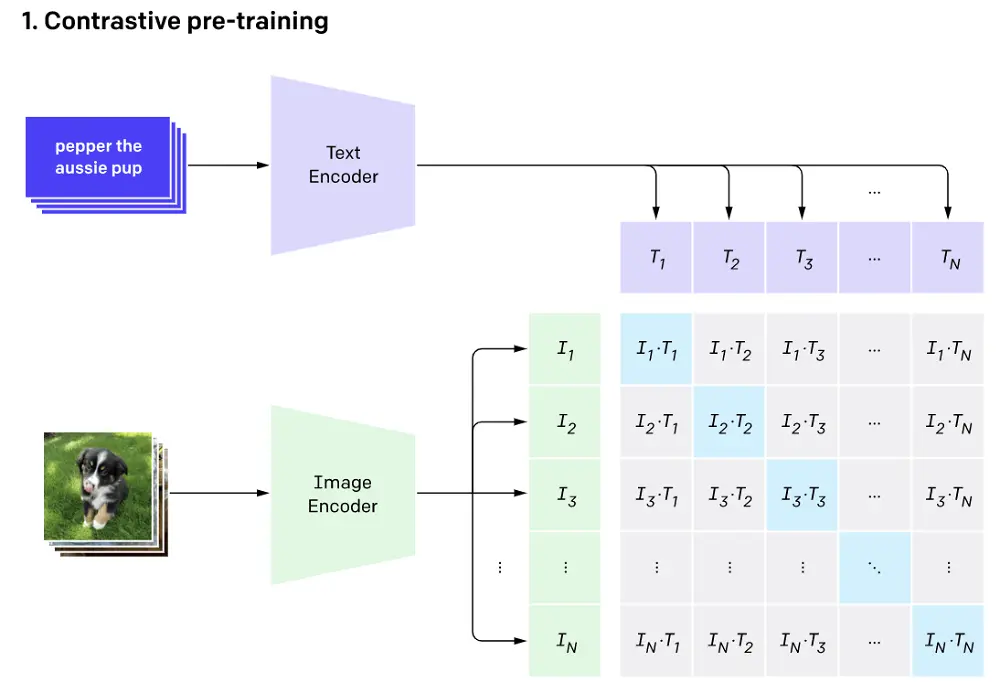

### Step 1: Caclulate Image Embeddings for Dataset

We first want to make our image database easily searchable. To achieve this, we calculate the image embedding for each image using the image encoder. **This has already been done for you,** because it is computationally intensive. Below is the code for reference.

In [ ]:
# import os
# import torch
# import torchvision.transforms as transforms
# from PIL import Image
# from open_clip import create_model_and_transforms, tokenizer
# import torch.nn.functional as F
# import pandas as pd
# from tqdm import tqdm

# # Configuration
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model_name = "ViT-B/32"
# pretrained = "openai"
# batch_size = 128
# image_folder = "/scratch/cliao25/train2014/train2014"  # Replace with your folder path

# # Load the model and preprocess function
# model, preprocess_train, preprocess_val = create_model_and_transforms(model_name, pretrained=pretrained)
# model = model.to(device)
# model.eval()

# # Image transformations (using preprocess_val from open_clip)
# transform = preprocess_val

# # Collect all image paths
# image_paths = [os.path.join(image_folder, fname) for fname in os.listdir(image_folder) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]
# print('Number of images:', len(image_paths))
# # DataFrame to store results
# results = []

# # Function to load and preprocess images
# def load_images(batch_paths):
#     images = []
#     for path in batch_paths:
#         try:
#             image = Image.open(path).convert("RGB")
#             images.append(transform(image))
#         except Exception as e:
#             print(f"Error loading image {path}: {e}")
#     return torch.stack(images) if images else None

# # Process images in batches
# with torch.no_grad():
#     for i in tqdm(range(0, len(image_paths), batch_size), desc="Processing images"):
#         batch_paths = image_paths[i:i + batch_size]
#         images = load_images(batch_paths)
#         if images is None:  # Skip if no valid images in this batch
#             continue

#         images = images.to(device)
#         embeddings = model.encode_image(images)
#         embeddings = F.normalize(embeddings, p=2, dim=1)  # Normalize the embeddings

#         for path, emb in zip(batch_paths, embeddings):
#             results.append({"file_name": os.path.basename(path), "embedding": emb.cpu().numpy()})

# Save results to a DataFrame
# df = pd.DataFrame(results)
# df.to_pickle('image_embeddings.pickle')

Number of images: 82783


Processing images: 100%|██████████████████████| 647/647 [06:46<00:00,  1.59it/s]


Run the code below to examine the dataframe.

The dataframe `df` has two columns. The first column is the image file in the dataset folder. The second column is the image embedding corresponding to that image.

In [4]:
import pandas as pd
df = pd.read_pickle('image_embeddings.pickle')
df

,file_name,embedding
0,COCO_train2014_000000017154.jpg,"[-0.013383481, 0.025817081, 0.027312446, 0.029..."
1,COCO_train2014_000000356738.jpg,"[-0.018858824, 0.066932686, -0.023063071, -0.0..."
2,COCO_train2014_000000124428.jpg,"[0.034829315, -0.014156876, -0.0095499605, 0.0..."
3,COCO_train2014_000000277426.jpg,"[-0.00678755, -0.04286685, 0.0022111333, -0.02..."
4,COCO_train2014_000000474616.jpg,"[0.017978659, 0.002254282, -0.00318466, 0.0169..."
...,...,...
82778,COCO_train2014_000000090708.jpg,"[-0.03795312, -0.012270769, 0.009529039, 0.018..."
82779,COCO_train2014_000000493505.jpg,"[-0.013693268, 0.03612202, -0.018199965, 0.000..."
82780,COCO_train2014_000000517584.jpg,"[0.018850781, -0.0006246638, -0.02557726, 0.03..."
82781,COCO_train2014_000000234720.jpg,"[-0.008946741, -0.00071093737, -0.009944752, 0..."


### Step 2: Image-to-Image Search

Now you will write some code to find the closest image in the dataset to a given image query.

Find a random image off the internet. Use the CLIP image encoder to encode the image; let's call this the `query_embedding`.

Now, display the image in the dataset that has the **maximum cosine similarity with the query embedding.**

**It is very important that you use the `ViT-B/32, openai` version of the CLIP model** to be consistent with the embeddings you were given.

Here's the documentation for CLIP: https://github.com/mlfoundations/open_clip

**Hint:** Take advantage of the code given to you at the bedginning of this assignment.

In [3]:
! pip install open-clip-torch

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 MB 12.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 14.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 10.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 12.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip


This is my query image


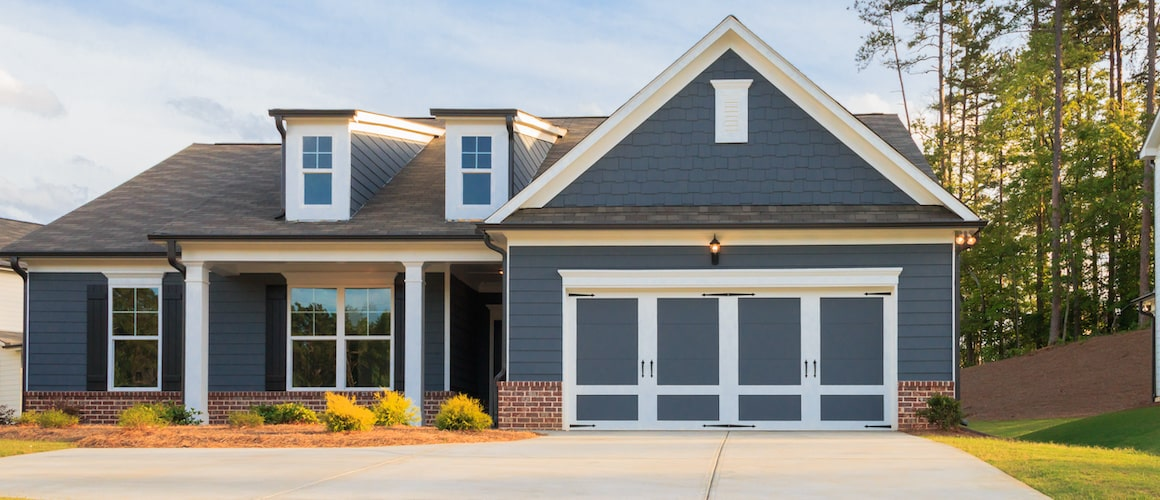

In [11]:
from IPython.display import Image
print('This is my query image')
Image(filename="house.jpg")

/Users/tiffliu/Library/Python/3.9/lib/python/site-packages/open_clip/factory.py:372: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


This is my query image


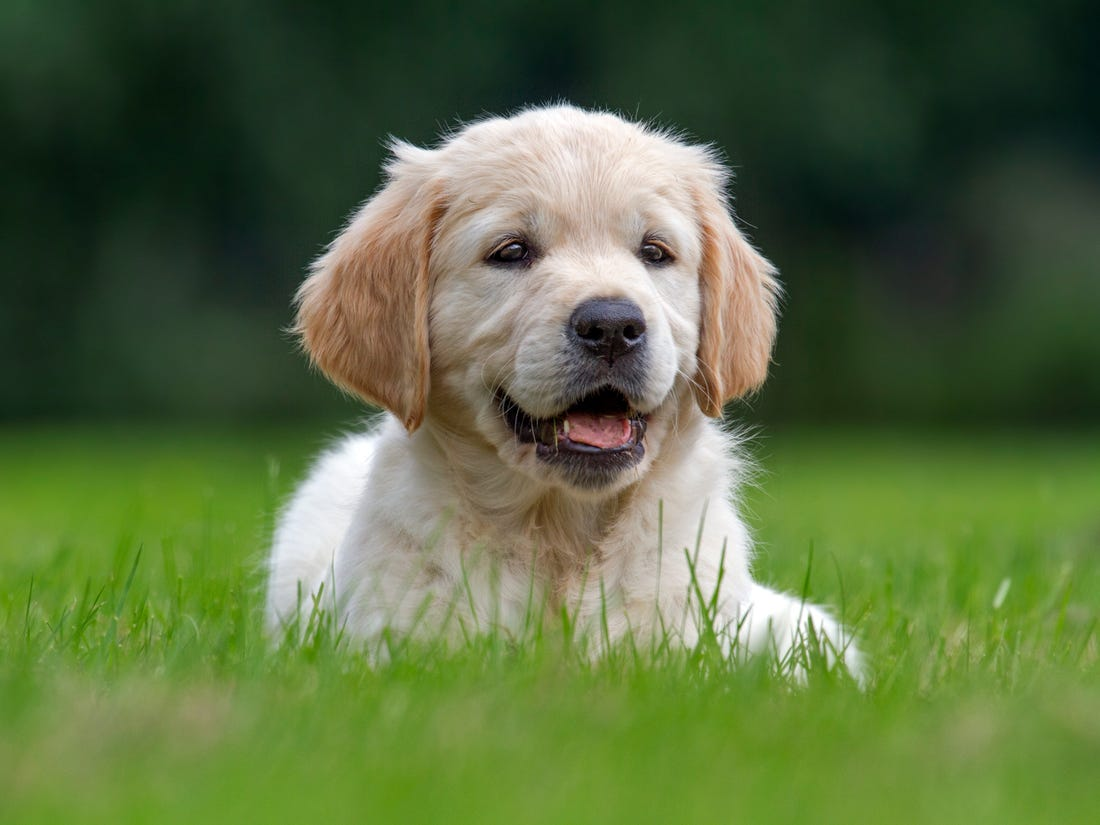

In [2]:
from PIL import Image
from open_clip import create_model_and_transforms, tokenizer
import torch.nn.functional as F

model, _, preprocess = create_model_and_transforms('ViT-B/32', pretrained='openai')

# This converts the image to a tensor
#image = preprocess(Image.open("house.jpg")).unsqueeze(0)
# this image is my own, and then we make query emebdding with this, then we see what in the dataframe best matches in the next cell
image = preprocess(Image.open("dog.jpg")).unsqueeze(0)

from IPython.display import Image, display
print('This is my query image')
display(Image(filename="dog.jpg"))

# This calculates the query embedding
query_embedding = F.normalize(model.encode_image(image))

In [5]:
# Retrieve the image path that corresponds to the embedding in `df`
# with the highest cosine similarity to query_embedding
import pandas as pd
import torch
import torch.nn.functional as F
from PIL import Image
from open_clip import create_model_and_transforms

impath = None
max_similarity = -1
for _, row in df.iterrows():
    dataset_embedding = torch.tensor(row['embedding'])  # Convert numpy array to tensor
    similarity = F.cosine_similarity(query_embedding, dataset_embedding.unsqueeze(0)).item()
    if similarity > max_similarity:
        max_similarity = similarity
        impath = row['file_name']  # Store the image path of the closest match
        impath = './coco_images_resized/' + impath

print(f"Closest image path: {impath}")
print(f"Highest cosine similarity: {max_similarity:.4f}")

Closest image path: ./coco_images_resized/COCO_train2014_000000274139.jpg
Highest cosine similarity: 0.8752


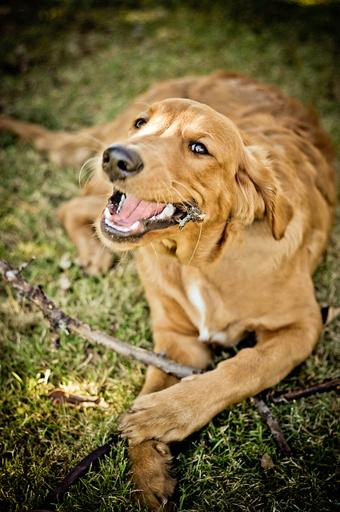

In [56]:
from IPython.display import Image
Image(filename=impath)

### Step 3: Text-to-Image Search

Now implement text-to-image-search.

The only difference here is that the query is a string of text. You will use the text encoder to obtain the corresponding query embedding.

Closest image path: ./coco_images_resized/COCO_train2014_000000333863.jpg
Highest cosine similarity: 0.2799


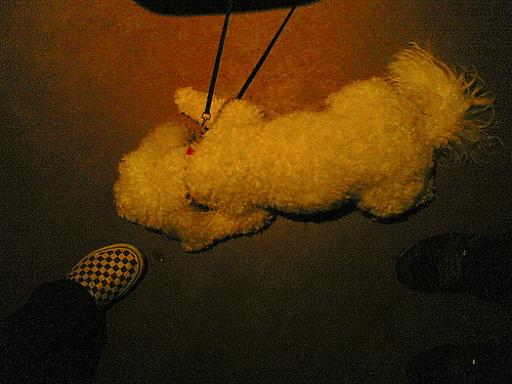

In [6]:
import open_clip

tokenizer = open_clip.get_tokenizer('ViT-B-32')
model.eval()
text = tokenizer(["dog"]) # change this to be what you want... cat cuddles with dog on sofa.
query_embedding = F.normalize(model.encode_text(text))

# Retrieve the image path that corresponds to the embedding in `df`
# with the highest cosine similarity to query_embedding

# but now with text!!!
# im not gonna lie i jsut copied what i had for imge and used that here,,, did not change a thing

import pandas as pd
import torch
import torch.nn.functional as F
from PIL import Image
from open_clip import create_model_and_transforms

impath = None
max_similarity = -1
for _, row in df.iterrows():
    dataset_embedding = torch.tensor(row['embedding'])  # Convert numpy array to tensor
    similarity = F.cosine_similarity(query_embedding, dataset_embedding.unsqueeze(0)).item()
    if similarity > max_similarity:
        max_similarity = similarity
        impath = row['file_name']  # Store the image path of the closest match
        impath = './coco_images_resized/' + impath

print(f"Closest image path: {impath}")
print(f"Highest cosine similarity: {max_similarity:.4f}")

from IPython.display import Image
Image(filename=impath)

### Step 4:  Hybrid Query

A more interesting query could contain both image and text.

For example, instead of explicitly searching for an "image of snowy house", you could search for "snowy" + an image of a house.


In this case, you should embed both the text query and the image query. Then, the query embedding is a weighted average of the two embeddings.

Closest image path: ./coco_images_resized/COCO_train2014_000000107758.jpg
Highest cosine similarity: 0.8857


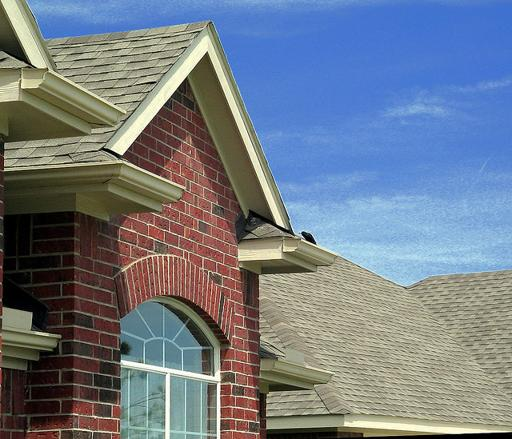

In [38]:
from PIL import Image

image = preprocess(Image.open("house.jpg")).unsqueeze(0)
image_query = F.normalize(model.encode_image(image))
text = tokenizer(["snowy"])
text_query = F.normalize(model.encode_text(text))

# we use lam + query for the weighted average
# i find that lower lam (aka weighting text less and image more) results in higher cosine similrity
# but then it doesnt appear as though the actual image is as good..?
# so liek overfitting... ?
lam  = 0.1 # tune this

query = F.normalize(lam * text_query + (1.0 - lam) * image_query)

# HUHHHHHHHHHHH
impath = None
max_similarity = -1
for _, row in df.iterrows():
    dataset_embedding = torch.tensor(row['embedding'])  # Convert numpy array to tensor
    similarity = F.cosine_similarity(query, dataset_embedding.unsqueeze(0)).item()
    if similarity > max_similarity:
        max_similarity = similarity
        impath = row['file_name']  # Store the image path of the closest match
        impath = './coco_images_resized/' + impath

print(f"Closest image path: {impath}")
print(f"Highest cosine similarity: {max_similarity:.4f}")


from IPython.display import Image
Image(filename=impath)